
1) Gerekli Kütüphanelerin Eklenmesi

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics


2) Veri Toplamak

"Veri Seti: https://www.kaggle.com/datasets/mirichoi0218/insurance"

In [ ]:
df = pd.read_csv("insurance.csv")

3) Veri İncelemek ve Görselleştirmek

#Veri setinin ilk 5i


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


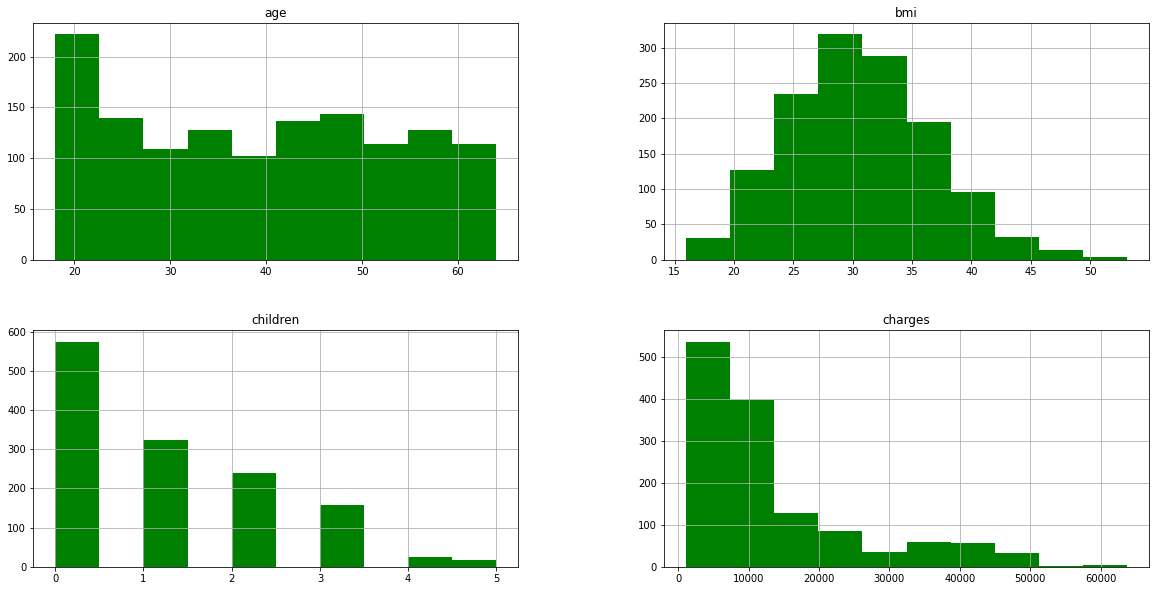

In [ ]:
df.hist(figsize =(20,10), color = "green")
plt.show()

In [ ]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


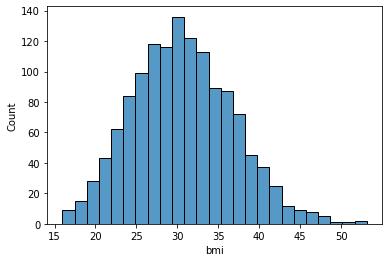

In [ ]:
sns.histplot(df.bmi)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


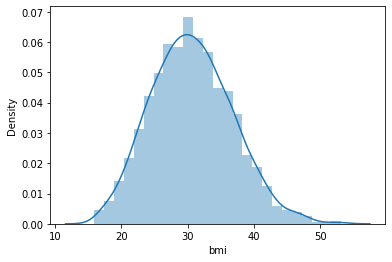

In [ ]:
sns.distplot(df.bmi)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


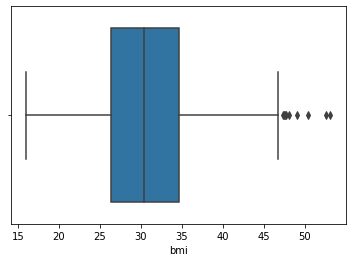

In [ ]:
sns.boxplot(df.bmi)

In [ ]:
df.bmi

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

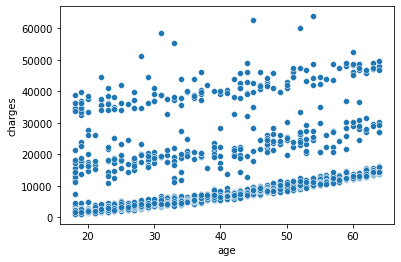

In [ ]:
sns.scatterplot(x="age",y="charges",data=df)

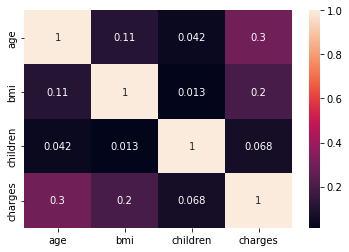

In [ ]:
corr=df.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           annot=True)

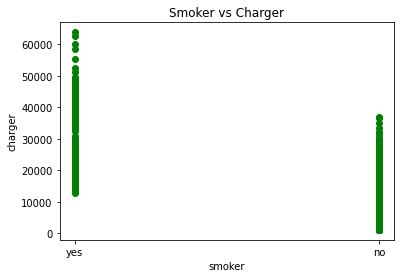

In [ ]:
plt.scatter(x=df["smoker"],y=df["charges"],color="green")
plt.xlabel("smoker")
plt.ylabel("charger")
plt.title("Smoker vs Charger")
plt.show()

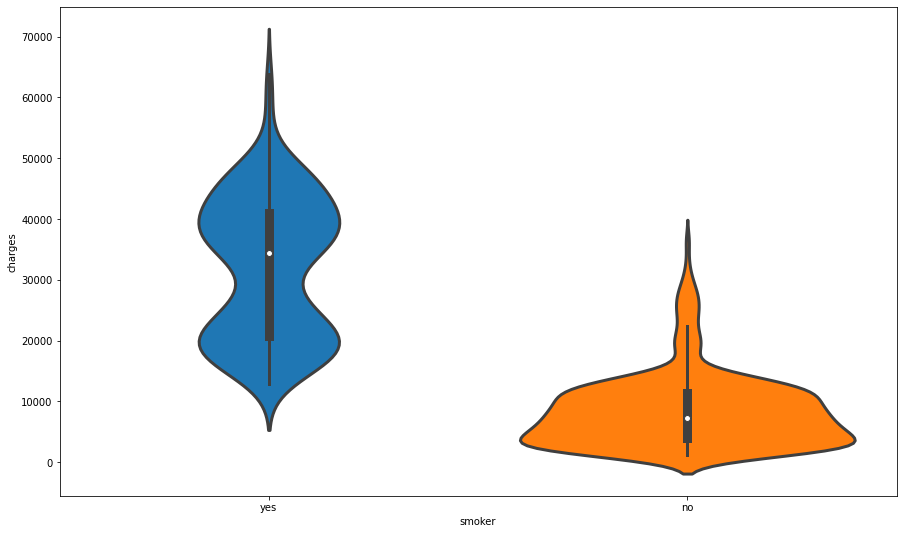

In [ ]:
plt.figure(figsize=(15,9))
sns.violinplot(x="smoker" , y="charges" , data=df,linewidth=3,saturation=1.5)
plt.show()
#Sigara içen insanların sağlık sigortası masrafları içmeyenlere göre daha fazla.

In [ ]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

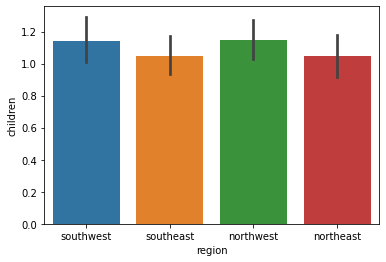

In [ ]:
sns.barplot(x="region",y="children",data=df)


In [ ]:
children_count = df.groupby("region")["children"].sum()
children_count

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

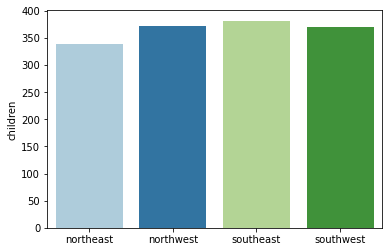

In [ ]:
sns.barplot(x = children_count.index.tolist(), y = children_count, palette="Paired")

In [ ]:
df.groupby(["smoker","region"]).size().reset_index(name="count")
#Sigara kullanmayanların en çok olduğu bölge>>Southeast
#Sigara kullananların en çok olduğu bölge>>Southeast


,smoker,region,count
0,no,northeast,257
1,no,northwest,267
2,no,southeast,273
3,no,southwest,267
4,yes,northeast,67
5,yes,northwest,58
6,yes,southeast,91
7,yes,southwest,58


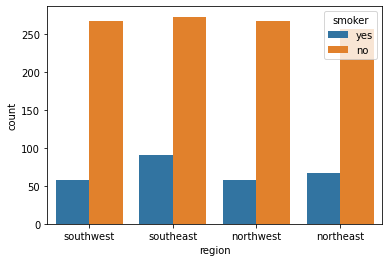

In [ ]:
sns.countplot(x="region",data=df,hue="smoker")

In [ ]:
df.groupby(["sex"])["bmi"].describe()
#Kadın ve erkeklerin vücut kitle indekslerinin ortalaması yaklaşık olarak birbirlerine yakın.

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,30.377749,6.046023,16.815,26.125,30.1075,34.31375,48.07
male,676.0,30.943129,6.140435,15.960,26.410,30.6875,34.99250,53.13


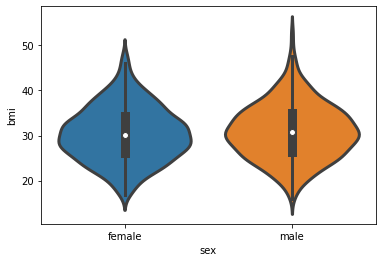

In [ ]:
sns.violinplot(x="sex",y="bmi",data=df,linewidth=3)

In [ ]:
cm=df.groupby(["region"])["children"].sum().reset_index(name="count")
cm

,region,count
0,northeast,339
1,northwest,373
2,southeast,382
3,southwest,371


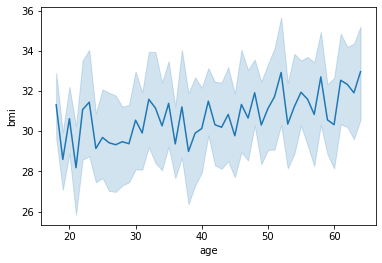

In [ ]:
sns.lineplot(x="age",y="bmi",data=df)
#20'li yaşlarda indeksler en düşük değerlerini alırken 50'li yaşlarda en yüksek değerlerini almış

In [ ]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4])

In [ ]:
df.groupby(["children"])["bmi"].describe()

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,30.550296,6.039106,15.960,26.14375,30.3025,34.74625,53.13
1,324.0,30.623148,6.101435,16.815,26.61500,30.0150,34.23750,52.58
2,240.0,30.978104,6.509644,16.815,25.78625,31.6400,35.35750,48.07
3,157.0,30.684331,5.787173,18.905,27.26500,30.4950,34.32000,46.53
4,25.0,31.391200,4.627211,24.415,28.21500,29.6400,33.66000,41.47
5,18.0,29.605000,7.139686,18.300,24.30250,28.5500,33.05500,46.75


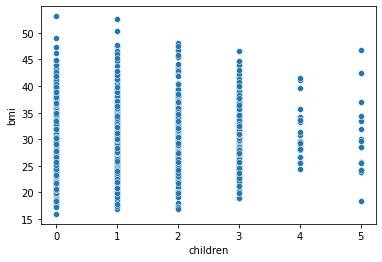

In [ ]:
sns.scatterplot(x="children",y="bmi",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


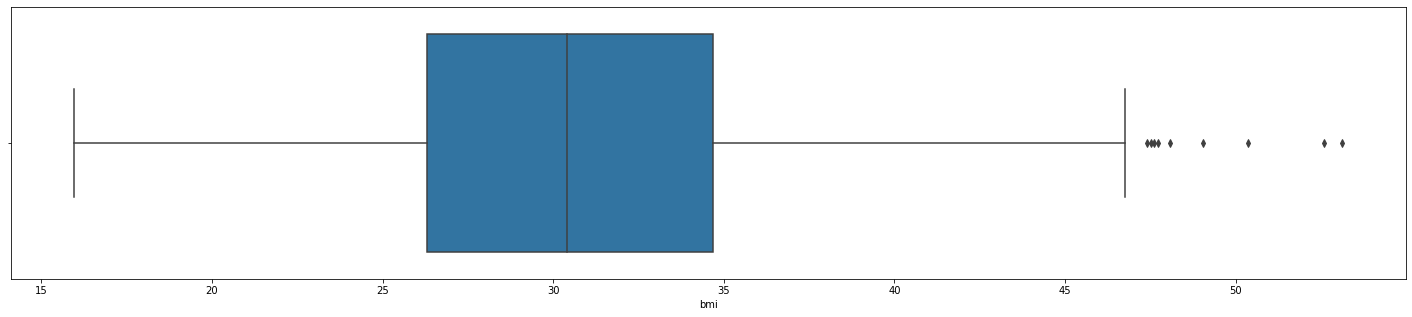

In [ ]:
plt.figure(figsize=(25,5))
sns.boxplot(df["bmi"],data=df);
plt.show()
#bmi özniteliğinde aykırı değerler bulunmakta.

In [ ]:
df_bmi=df["bmi"]
Q1=df_bmi.quantile(0.25)
Q3=df_bmi.quantile(0.75)
IQR=Q3-Q1
IQR

8.3975

In [ ]:
Q1
alt_sinir=Q1-1.5*IQR
alt_sinir

13.7

In [ ]:
Q3
ust_sinir=Q3+1.5*IQR
ust_sinir

47.290000000000006

In [ ]:
alt=(df_bmi < alt_sinir)
df_bmi[alt]
#öznitelikte alt sınırın altında bir aykırı değer bulunmamakta.

Series([], Name: bmi, dtype: float64)

In [ ]:
ust=(df_bmi> ust_sinir)
df_bmi[ust]
#üst sınırda 9 adet aykır değer bulunmakta.

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

In [ ]:
df_bmi.mean()
#Ortalama bazı değerlerden çok düşük olduğu için aykırı değerleri üst sınır değeriyle doldurduk.Çünkü değerler üst sınıra epey yakın.

30.66339686098655

In [ ]:
df_bmi[ust]=ust_sinir
df_bmi[ust]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


116     47.29
286     47.29
401     47.29
543     47.29
847     47.29
860     47.29
1047    47.29
1088    47.29
1317    47.29
Name: bmi, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


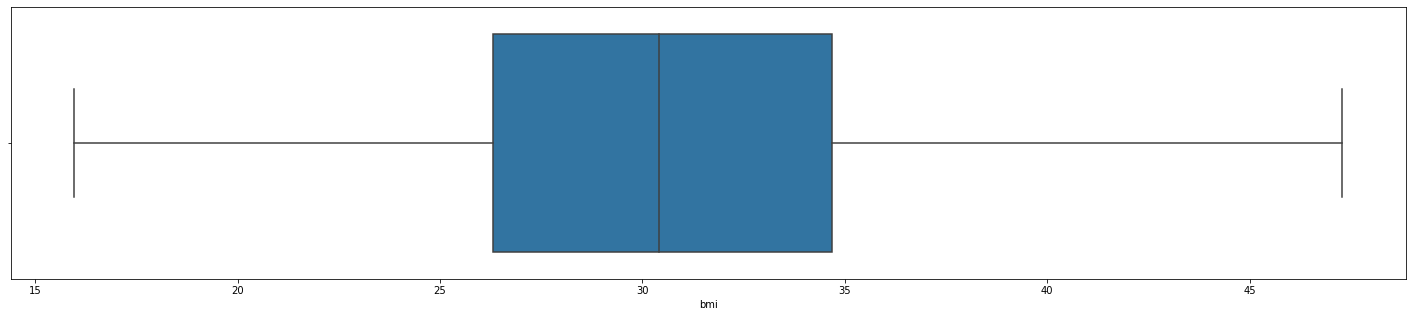

In [ ]:
plt.figure(figsize=(25,5))
sns.boxplot(df["bmi"],data=df);
plt.show()
#Aykırı değer yok.

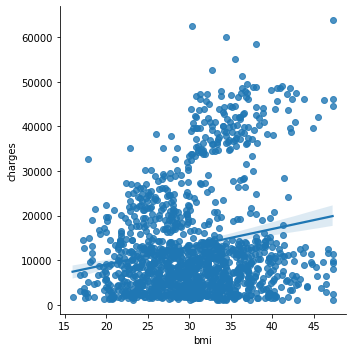

In [ ]:
sns.lmplot(x = "bmi", y="charges", data=df,);
#Kitle indeksi arttıkça ödenen masraflarda artmış.Yoğunluk olarak hepsi aynı bölgede toplanmış.

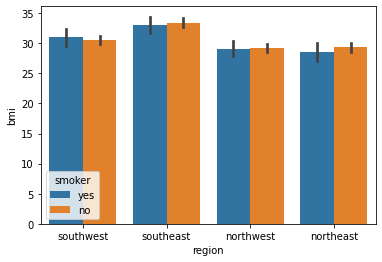

In [ ]:
sns.barplot(x="region",y="bmi",hue="smoker",data=df)
#Bölgelerde sigara içip içmemek hemen hemen aynı ortalamalarda.

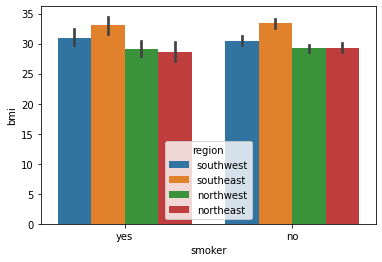

In [ ]:
sns.barplot(x="smoker",y="bmi",hue="region",data=df)

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**4**.Veriyi ML Modellerine  Uygun Hale Getirmek

In [ ]:
x=df["smoker"]
y=df["charges"]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=0.8)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
print((len(x_train)))
print((len(y_train)))
print((len(x_test)))
print((len(y_test)))

1070
1070
268
268


In [ ]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
x_train.shape

(1070, 1)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(1070, 1)
(1070, 1)


5) Model Seçimi ve Modelin Eğitilmesi

In [ ]:
lin_model = sklearn.linear_model.LinearRegression()
lin_model.fit(x_train, y_train)
LinearRegression()

ValueError: ignored

6) Modelin Optimize Edilmesi

In [ ]:
predictions = lin_model.predict(x_test)
print(predictions)

NotFittedError: ignored

In [ ]:
for i in range(len(x_test)):
print(f"{i} : Actual Value: {y_test[i]} - Predicted Value:
{predictions[i]}")

IndentationError: ignored

In [ ]:
r2 = sklearn.metrics.r2_score(y_test, predictions)
mae = sklearn.metrics.mean_absolute_error(y_test, predictions)
mse = sklearn.metrics.mean_squared_error(y_test, predictions)
print(f"R2: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
x_predictions = lin_model.predict(x_train)
plt.scatter(x=df["Hours"], y=df["Scores"], color="green")
plt.plot(X_train, X_predictions)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs. Scores")
plt.show()

NameError: ignored

In [ ]:
7) Modelin Canlıya Alınması

In [ ]:
lin_model.predict([[5]])
array([[51.12775735]])
x_predictions = lin_model.predict(x_train)
plt.plot(x_train, X_predictions)
plt.scatter(x=df["Hours"], y=df["Scores"], color="green")
plt.scatter(x=5, y=lin_model.predict([[5]]), s=100, color="red")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs. Scores")
plt.show()

NotFittedError: ignored

In [ ]:
print(x)

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object


In [ ]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
import sklearn.model_selection

In [ ]:
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,train_size=0.8)

In [ ]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

1003     no
506      no
872      no
1177     no
733      no
       ... 
868      no
664     yes
850     yes
499      no
13       no
Name: smoker, Length: 1070, dtype: object
164      no
1036    yes
848      no
1093    yes
1243     no
       ... 
994     yes
823      no
253      no
447      no
657      no
Name: smoker, Length: 268, dtype: object
1003    21232.18226
506      2643.26850
872      5966.88740
1177     6496.88600
733      9447.25035
           ...     
868     13129.60345
664     27037.91410
850     37270.15120
499     13470.86000
13      11090.71780
Name: charges, Length: 1070, dtype: float64
164      5028.14660
1036    37484.44930
848      2974.12600
1093    33907.54800
1243     3171.61490
           ...     
994     16420.49455
823      8219.20390
253      4260.74400
447     11454.02150
657      4058.71245
Name: charges, Length: 268, dtype: float64
